# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pit
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Handling categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
x =le.fit_transform(df['Genre'])

In [8]:
df['gender']=x

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),gender
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [10]:
df.drop(['CustomerID','Genre'],axis=1,inplace=True)

In [11]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [12]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),gender
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
gender,0.060867,0.056410,-0.058109,1.000000


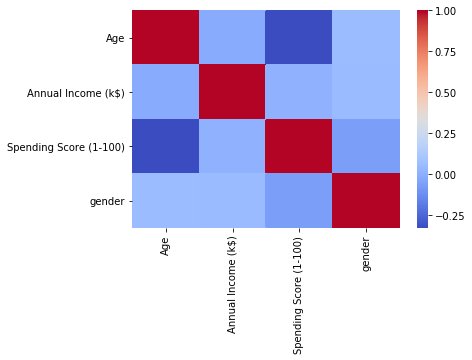

In [13]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [14]:
df.drop('gender',axis=1,inplace=True)

In [15]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [16]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


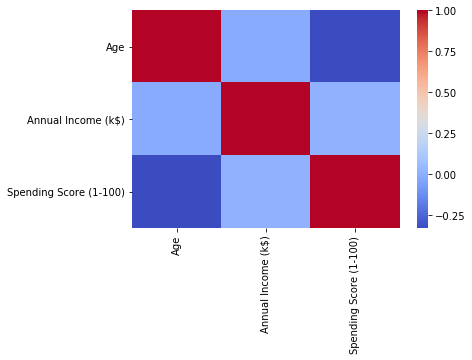

In [17]:
sns.heatmap(df.corr(),cmap='coolwarm')

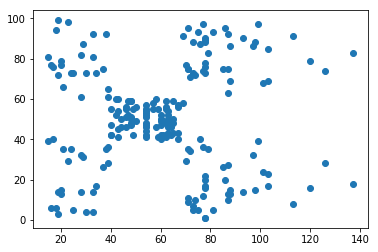

In [18]:
pit.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

In [19]:
df.drop('Age',axis=1,inplace=True)

In [20]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Standard Scaling 

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [24]:
x = ss.fit_transform(df)

In [25]:
df = pd.DataFrame(x,columns=df.columns)

In [26]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# importing KMeans-clustering Algorithm

In [27]:
from sklearn.cluster import KMeans

In [28]:
sse = []
for i in range(1,31):
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

In [29]:
sse

[400.0,
 269.6910121927639,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 46.40801968821768,
 37.22935522094305,
 32.82802898718322,
 29.614514694225925,
 26.776630253488076,
 23.874222991115793,
 21.669680774239886,
 19.784638042649505,
 17.85480438583211,
 16.304027621092334,
 15.046941744287665,
 13.99687879321966,
 13.28976899335743,
 12.27574397340809,
 11.156324036254414,
 10.797849362223825,
 10.143294870904015,
 9.613967771302855,
 9.080604619501408,
 8.392565020841655,
 8.244716748548367,
 8.194808902163322,
 7.2899359123062055,
 6.850351005617874]

# Elbow method

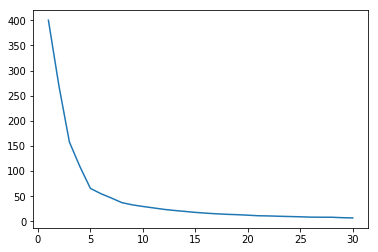

In [30]:
pit.plot(range(1,31),sse)

In [31]:
km = KMeans(n_clusters=5)

In [32]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
km.inertia_

65.56840815571681

In [34]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788]])

In [35]:
ypred =km.predict(df)

In [36]:
df['cluster']=ypred

In [37]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0


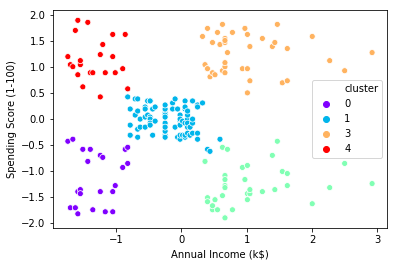

In [38]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df.cluster,palette='rainbow')

In [39]:
df['cluster'].value_counts()

1    81
3    39
2    35
0    23
4    22
Name: cluster, dtype: int64

In [40]:
d = {0:'Mid Inc-MidSpe',1:'High Inc-High Spe',2:'High Inc-Low Spe',3:'Low Inc-high Spe',4:'Low Inc-Low Spe'}

In [41]:
df['clusters']=df['cluster'].map(d)

In [42]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster,clusters
0,-1.738999,-0.434801,0,Mid Inc-MidSpe
1,-1.738999,1.195704,4,Low Inc-Low Spe
2,-1.700830,-1.715913,0,Mid Inc-MidSpe
3,-1.700830,1.040418,4,Low Inc-Low Spe
4,-1.662660,-0.395980,0,Mid Inc-MidSpe


In [43]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788]])

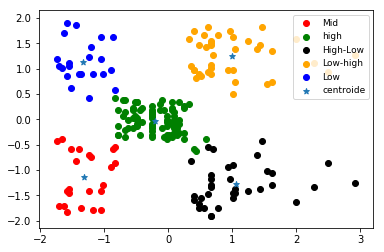

In [44]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]

pit.scatter(x=df0['Annual Income (k$)'],y=df0['Spending Score (1-100)'],color='red',label='Mid')
pit.scatter(x=df1['Annual Income (k$)'],y=df1['Spending Score (1-100)'],color='green',label='high')
pit.scatter(x=df2['Annual Income (k$)'],y=df2['Spending Score (1-100)'],color='black',label='High-Low')
pit.scatter(x=df3['Annual Income (k$)'],y=df3['Spending Score (1-100)'],color='orange',label='Low-high')
pit.scatter(x=df4['Annual Income (k$)'],y=df4['Spending Score (1-100)'],color='blue',label='Low')

pit.scatter(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],marker='*',label='centroide')

pit.legend(loc=1,fontsize=9)
